In [304]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.rcParams['font.family'] = ['Arial Unicode MS', 'Microsoft Yahei', 'SimHei', 'sans-serif']

In [7]:
#导入数据
biao=pd.read_excel("数据分析岗位笔试题_201807.xlsx","底表")

In [10]:
biao.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8141 entries, 0 to 8140
Data columns (total 10 columns):
ID           8141 non-null int64
商品名称         8141 non-null object
价格（元）        8139 non-null float64
近30天销量（件）    8141 non-null int64
广告词          4726 non-null object
促销活动         4150 non-null object
评论数          7081 non-null float64
商品链接         8141 non-null object
日期           8141 non-null datetime64[ns]
品牌           8141 non-null object
dtypes: datetime64[ns](1), float64(2), int64(2), object(5)
memory usage: 636.1+ KB


### 补齐缺失值

In [66]:
biao.loc[biao["价格（元）"].isnull()]
biao["价格（元）"][174]=2118.00
biao["价格（元）"][1063]=588.00 
biao.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8141 entries, 0 to 8140
Data columns (total 10 columns):
ID           8141 non-null int64
商品名称         8141 non-null object
价格（元）        8141 non-null float64
近30天销量（件）    8141 non-null int64
广告词          4726 non-null object
促销活动         4150 non-null object
评论数          7081 non-null float64
商品链接         8141 non-null object
日期           8141 non-null datetime64[ns]
品牌           8141 non-null object
dtypes: datetime64[ns](1), float64(2), int64(2), object(5)
memory usage: 636.1+ KB


E:\anaconda\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until
E:\anaconda\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.


### 数据总体情况

In [249]:
biao.describe()

,ID,价格（元）,近30天销量（件）,评论数,总价
count,8.141000e+03,8141.000000,8141.000000,7081.000000,8.141000e+03
mean,4.731799e+11,397.797253,335.266798,1148.968084,7.098907e+04
std,1.700738e+11,640.002375,1122.819803,3282.763239,8.629580e+05
min,1.379690e+10,0.000000,0.000000,0.000000,0.000000e+00
25%,5.237269e+11,99.900000,15.000000,47.000000,3.476000e+03
50%,5.377758e+11,198.000000,56.000000,203.000000,1.196800e+04
75%,5.425821e+11,399.000000,208.000000,825.000000,4.128000e+04
max,5.649853e+11,11512.800000,26620.000000,67514.000000,6.501163e+07


In [658]:

key=lambda x:str(x.year)+str("-")+str(x.month)
biao["月份"]=biao["日期"].apply(key)
biao["总价"]=biao["价格（元）"]*biao["近30天销量（件）"]
biao
biao.to_excel("数据分析.xlsx","表")

### 白酒总体分布情况及销量

#### 白酒行业产品结构占比
* 200以下--低端
* 200-800--中端
* 800以上--高端


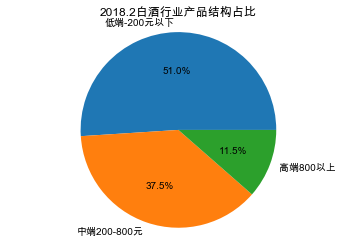

In [663]:
eryuebiao=biao[biao["日期"].isin(["2018-02-27"])]
# eryuebiao.groupby("价格（元）").count()
qujian=eryuebiao["价格（元）"]
bins=[0,200,800,12000]
cats=pd.cut(qujian,bins)
# cats = pd.cut(qujian, 10, precision=1) 
cats
jigou=eryuebiao["价格（元）"].groupby(cats).count()
y=["低端-200元以下","中端200-800元","高端800以上"]
x=[450,331,101]
plt.pie(x,labels=y,autopct='%1.1f%%',shadow=False, )
plt.axis('equal') #正圆形饼图,x/y轴尺寸相等.默认是扁图,
plt.title("2018.2白酒行业产品结构占比")
plt.show()


### 2018.2各价位段促销活动占比

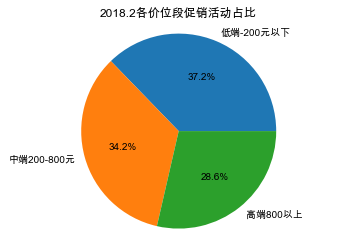

In [626]:
eryuebiao=biao[biao["日期"].isin(["2018-02-27"])]
cu=eryuebiao[eryuebiao["促销活动"].notnull()]
qujian=eryuebiao["价格（元）"]
bins=[0,200,800,12000]
cats=pd.cut(qujian,bins)

cats
eryuebiao["促销活动"].groupby(cats).count()
y=["低端-200元以下","中端200-800元","高端800以上"]
x=[209/450,141/331,36/101]
plt.pie(x,labels=y,autopct='%1.1f%%',shadow=False, )
plt.axis('equal') #正圆形饼图,x/y轴尺寸相等.默认是扁图,
plt.title("2018.2各价位段促销活动占比")
plt.show()
# cu.info()
# eryuebiao.info()

#### 各价位段的近30天销量情况

In [665]:
eryuebiao=biao[biao["日期"].isin(["2018-02-27"])]
qujian=eryuebiao["价格（元）"]
# bins=[-1,50,100,150,200,250,300,350,400,1000,12000]
bins=[0,200,800,12000]
cats=pd.cut(qujian,bins)
# cats = pd.cut(qujian, 10, precision=1) 
cats

a=eryuebiao["近30天销量（件）"].groupby(cats)
# a=biao["总价"].groupby(cats)

def get_stats(group):
    return group.describe()
#     return {'min': group.min(), 'max': group.max(), 'count': group.count(), 'mean': group.mean()}

fenzu_count=a.apply(get_stats).unstack()
fenzu_count


,count,mean,std,min,25%,50%,75%,max
价格（元）,,,,,,,,
"(0, 200]",450.0,836.597778,1878.761308,1.0,61.25,206.0,705.75,15006.0
"(200, 800]",331.0,448.015106,1297.434645,1.0,38.50,111.0,327.00,13369.0
"(800, 12000]",101.0,424.089109,2177.514244,1.0,27.00,58.0,209.00,21685.0


In [464]:

a=eryuebiao["总价"].groupby(cats)

def get_stats(group):
    return group.describe()
#     return {'min': group.min(), 'max': group.max(), 'count': group.count(), 'mean': group.mean()}

zongjia_count=a.apply(get_stats).unstack()
zongjia_count

,count,mean,std,min,25%,50%,75%,max
价格（元）,,,,,,,,
"(0, 200]",450.0,88152.338667,2.059903e+05,80.0,6223.5,22619.5,72965.75,1591830.0
"(200, 800]",331.0,160286.468248,4.006430e+05,229.0,14830.0,40953.0,123082.00,3823534.0
"(800, 12000]",101.0,933106.625743,6.460501e+06,1598.0,39920.0,102120.0,277720.00,65011630.0


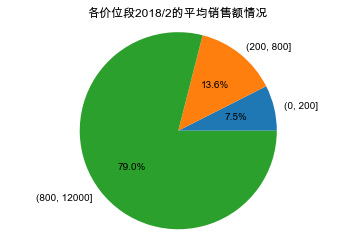

In [632]:
zongjia_count.index

zongjia_count["mean"].index
zongjia_count["mean"].values

x=["(0, 200]", "(200, 800]", "(800, 12000]"]

y=[ 88152.33866667, 160286.46824773, 933106.62574257]

# plt.figure(figsize = (10, 6))
# plt.bar(x,y)
# plt.title("各价位段2018/2的平均销售额情况")

plt.pie(y,labels=x,autopct='%1.1f%%',shadow=False, )
plt.axis('equal') #正圆形饼图,x/y轴尺寸相等.默认是扁图,
plt.title("各价位段2018/2的平均销售额情况")
plt.show()

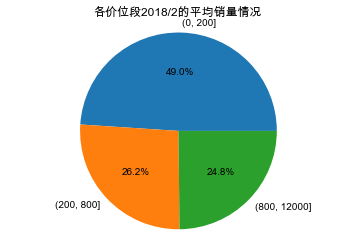

In [630]:
fenzu_count.index

fenzu_count["mean"].index
fenzu_count["mean"].values
# x=[     "(-1, 50]",     "(50, 100]",    "(100, 150]",   "(150, 200]" ,
#                      "(200, 250]",    "(250, 300]",    "(300, 350]",    "(350, 400]",
#                     "(400, 1000]","( 1000, 12000]"]
x=["(0, 200]", "(200, 800]", "(800, 12000]"]
# y=[ 961.25490196,  856.16463415, 1008.32231405,  570.4122807 ,
#         521.83018868,  753.765625  ,  515.5625    ,  413.89795918,
#         282.9625    ,  448.31081081]
y=[836.59777778, 448.01510574, 424.08910891]

# plt.figure(figsize = (10, 6))
# plt.bar(x,y)
# plt.title("各价位段2018/2的平均销量情况")

plt.pie(y,labels=x,autopct='%1.1f%%',shadow=False, )
plt.axis('equal') #正圆形饼图,x/y轴尺寸相等.默认是扁图,
plt.title("各价位段2018/2的平均销量情况")
plt.show()

#### 各品牌的销售量和销售额的分布情况

In [667]:
eryue_xiaoshou=eryuebiao.pivot_table("近30天销量（件）",index="品牌",columns="日期",margins=True).head(42).sort_values("All",ascending=False)
eryue_xiaoshou


日期,2018-02-27 00:00:00,All
品牌,,
江小白,2613.647059,2613.647059
飞天不老,1981.250000,1981.250000
年份原浆,1401.000000,1401.000000
茅台,1217.771930,1217.771930
红星,1056.925926,1056.925926
五粮液,928.875000,928.875000
劲酒,857.444444,857.444444
洋河,842.887755,842.887755
剑南春,809.250000,809.250000


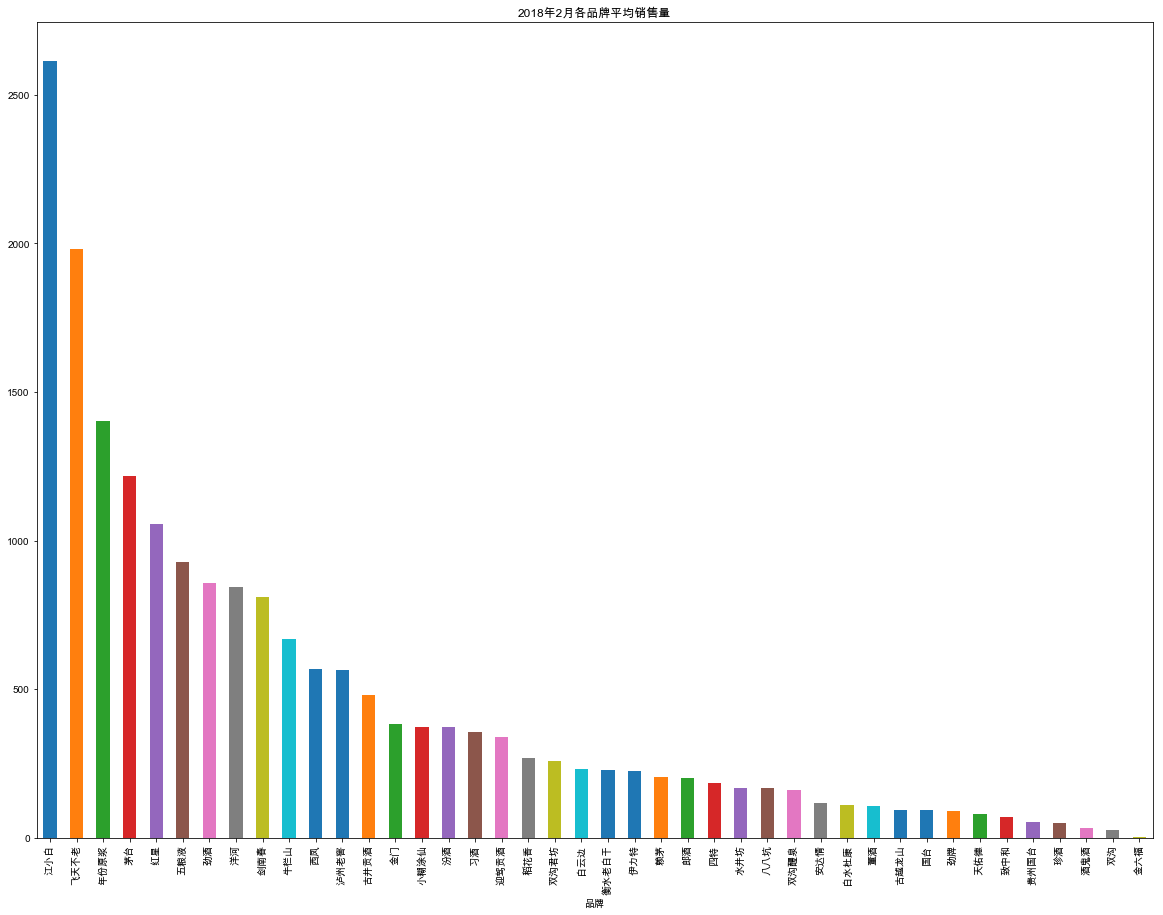

In [534]:
plt.figure(figsize = (20, 15))
plt.title("2018年2月各品牌平均销售量")
eryue_xiaoshou["All"].plot.bar()

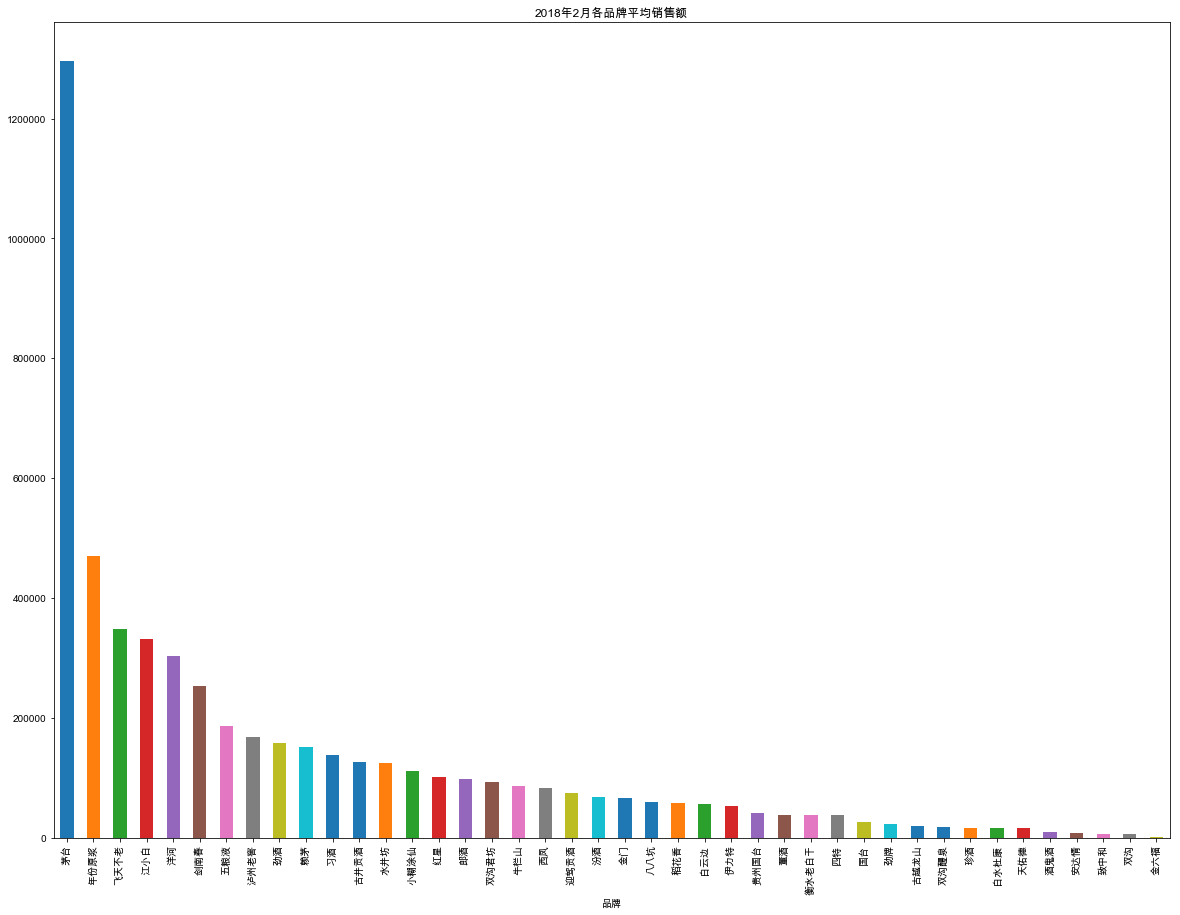

In [533]:
eryue_xiaoshou=eryuebiao.pivot_table("总价",index="品牌",columns="日期",margins=True).head(42).sort_values("All",ascending=False)
plt.figure(figsize = (20, 15))
plt.title("2018年2月各品牌平均销售额")
eryue_xiaoshou["All"].plot.bar()

In [494]:
# qianshi=biao[biao["月份"].isin(["2018-2"])].sort_values("近30天销量（件）",ascending=False).head(10)
# qianshi.pivot_table("价格（元）",index="品牌",columns="近30天销量（件）")
# qianshi
xiaoshou=biao.pivot_table("近30天销量（件）",index="品牌",columns="日期",margins=True).head(50).sort_values("All",ascending=False)
xiaoshou

日期,2017-05-24 00:00:00,2017-07-06 00:00:00,2017-08-15 00:00:00,2017-09-30 00:00:00,2017-11-03 00:00:00,2017-12-01 00:00:00,2017-12-26 00:00:00,2018-01-29 00:00:00,2018-02-27 00:00:00,All
品牌,,,,,,,,,,
Union,NaN,NaN,NaN,NaN,NaN,NaN,1774.833333,1568.166667,NaN,1671.500000
飞天不老,405.333333,294.666667,1069.333333,2481.500000,835.000000,1573.500000,783.500000,1824.200000,1981.250000,1215.161290
江小白,1109.937500,428.437500,448.882353,601.111111,606.777778,1168.050000,1091.111111,1505.210526,2613.647059,1069.301887
红星,556.464286,944.357143,646.312500,1207.500000,1106.884615,1438.583333,1186.296296,1224.700000,1056.925926,1027.068548
舒可曼,NaN,NaN,NaN,NaN,NaN,NaN,666.000000,582.000000,NaN,624.000000
牛栏山,301.303571,390.180328,249.059524,491.976190,465.376471,599.051546,496.216495,727.414141,668.785714,507.587385
劲酒,270.666667,270.434783,324.307692,564.320000,480.333333,617.083333,383.586207,771.240000,857.444444,499.099057
年份原浆,3.000000,31.000000,16.000000,NaN,164.000000,649.000000,328.000000,929.000000,1401.000000,440.125000
五粮液,174.210526,140.899160,230.841667,468.133858,261.101562,447.333333,345.346154,901.812500,928.875000,439.582811


In [340]:
xiaoshoue=biao.pivot_table("总价",index="品牌",columns="日期",margins=True).head(50).sort_values("All",ascending=False)
xiaoshoue

日期,2017-05-24 00:00:00,2017-07-06 00:00:00,2017-08-15 00:00:00,2017-09-30 00:00:00,2017-11-03 00:00:00,2017-12-01 00:00:00,2017-12-26 00:00:00,2018-01-29 00:00:00,2018-02-27 00:00:00,All
品牌,,,,,,,,,,
茅台,21480.414754,29902.058462,27240.760317,73378.482258,61785.124590,91937.291525,66603.417460,697481.210448,1.295829e+06,257172.541577
飞天不老,57466.333333,49684.000000,154390.000000,406445.500000,151769.666667,296753.000000,120276.333333,279795.200000,3.487390e+05,198771.516129
年份原浆,948.000000,9796.000000,5056.000000,NaN,48872.000000,205084.000000,103648.000000,293564.000000,4.707360e+05,142213.000000
江小白,80802.187500,42665.000000,44908.176471,66190.722222,62553.611111,123500.450000,118942.755556,186391.642105,3.320140e+05,118572.133145
洋河,39176.594203,66546.925373,32309.419753,73081.693069,40635.351852,111642.163265,49846.606838,159443.184874,3.034557e+05,101438.393706
赖茅,NaN,NaN,NaN,NaN,NaN,NaN,7187.500000,102145.500000,1.516102e+05,86981.083333
劲酒,35575.833333,39843.478261,51643.769231,89405.280000,81098.041667,95029.708333,60669.689655,128388.920000,1.584288e+05,81049.828868
五粮液,21083.591228,23616.650420,33669.749167,77371.087402,43252.461719,81236.030081,62031.650769,154924.890278,1.858821e+05,76813.648344
剑南春,26151.500000,78438.484848,29178.727273,75604.645161,25163.112903,61706.913793,42838.750000,112084.838710,2.533702e+05,75861.970714


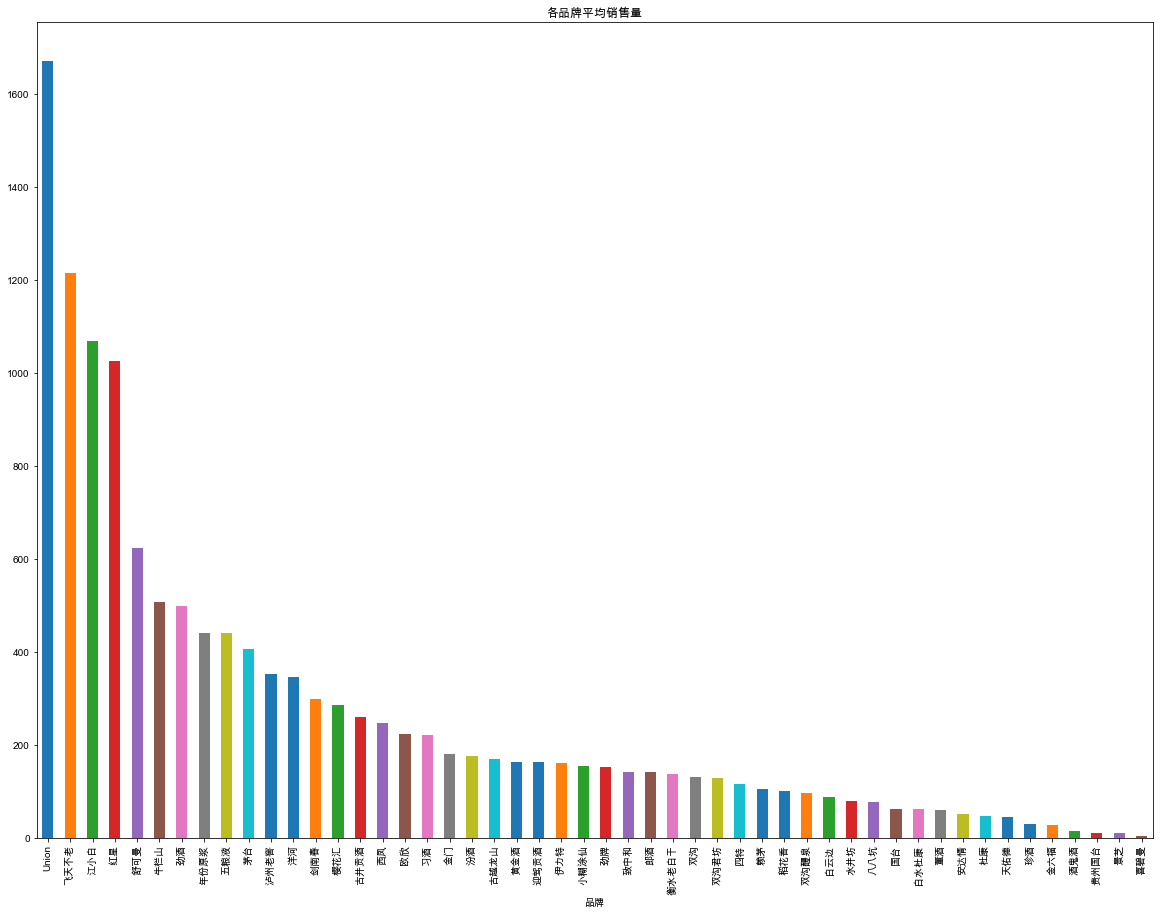

In [474]:
plt.figure(figsize = (20, 15))
plt.title("各品牌平均销售量")
xiaoshou["All"].plot.bar()


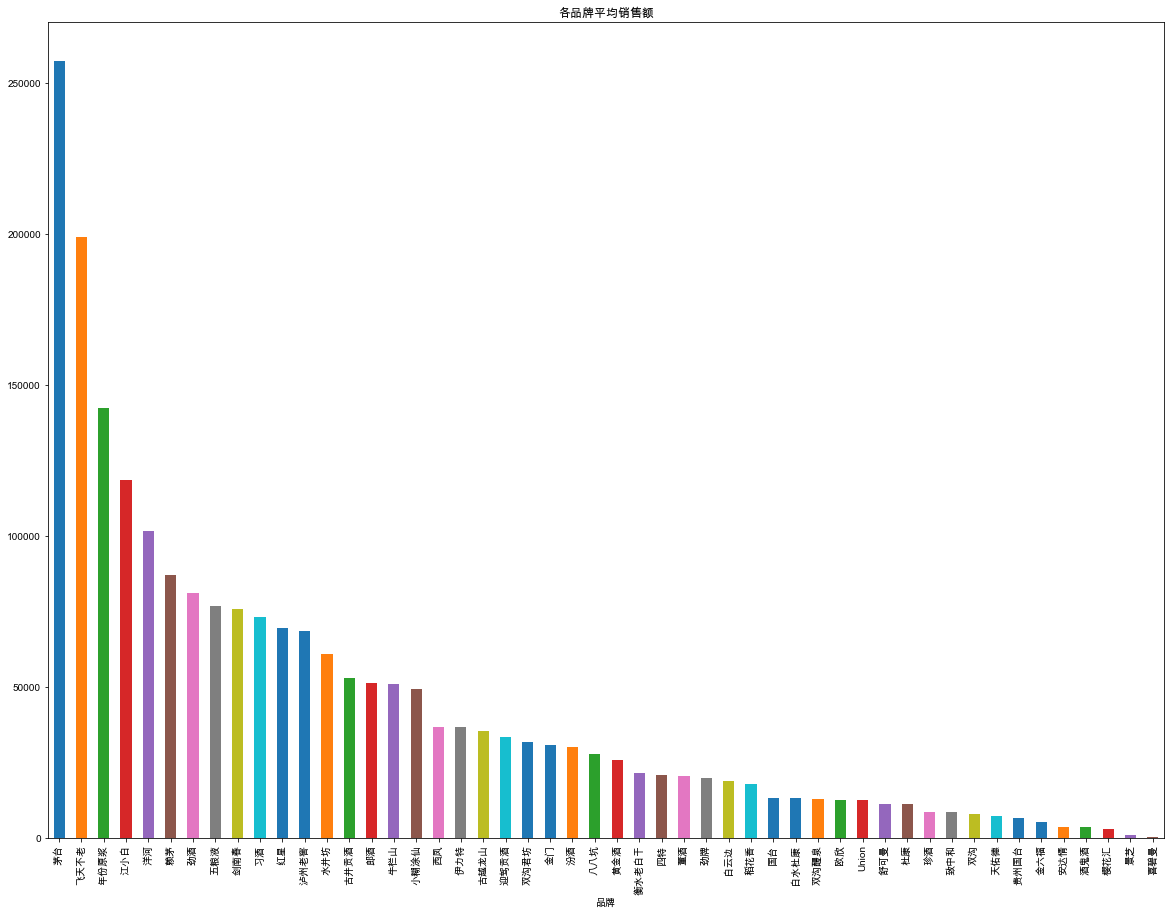

In [342]:
plt.figure(figsize = (20, 15))
plt.title("各品牌平均销售额")
xiaoshoue["All"].plot.bar()

Text(0.5,1,'总体销售量趋势')

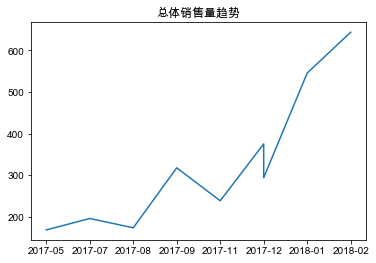

In [407]:
xiaoliang_zong=biao.pivot_table("近30天销量（件）",index="品牌",columns="日期",margins=True)
xiaoliang_zong.loc["All",].index
xiaoliang_zong.loc["All",].values
x=["2017-05", "2017-07", "2017-08",
       "2017-09", "2017-11", "2017-12",
       "2017-12", "2018-01", "2018-02"]
y=[168.85958005, 196.29662078, 173.95913734, 317.90700219,
       238.84615385, 375.39653304, 294.19900498, 545.48026949,
       643.53174603]
plt.plot(x,y)
plt.title("总体销售量趋势")

Text(0.5,1,'总体销售额趋势')

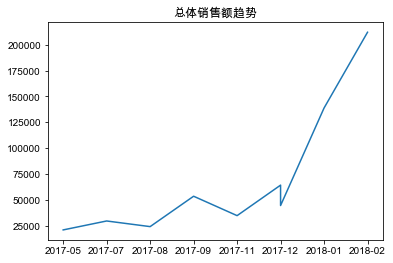

In [408]:
xiaoliang_zonge=biao.pivot_table("总价",index="品牌",columns="日期",margins=True)
xiaoliang_zonge.loc["All",].index
xiaoliang_zonge.loc["All",].values
x=["2017-05", "2017-07", "2017-08",
       "2017-09", "2017-11", "2017-12",
       "2017-12", "2018-01", "2018-02"]
y=[ 21027.9019685 ,  29662.63817272,  24216.78876277,  53568.37822757,
        34819.00576923,  64290.43304442,  44581.31532338, 138787.0946102 ,
       211980.88729025]
plt.plot(x,y)
plt.title("总体销售额趋势")

In [243]:
biao.groupby("品牌").sum().sort_values("近30天销量（件）",ascending=False).head(10)

,ID,商品名称,价格（元）,近30天销量（件）,广告词,促销活动,评论数,商品链接,日期,品牌,总价
0,537013830676,江小白品鉴酒更多优惠请见详情页非卖品请勿下单！,29.0,121,单纯高粱酿造 精制包装 特色语录,NaN,67514.0,https://chaoshi.detail.tmall.com/item.htm?id=5...,2018-02-27,江小白,3509.0
1,525501233363,牛栏山 46度二锅头500mL*12整箱（绿瓶）装 清香型,78.0,8027,正宗牛栏山 地道北京味,NaN,26144.0,https://chaoshi.detail.tmall.com/item.htm?id=5...,2018-02-27,牛栏山,626106.0
2,540011154689,泸州老窖 泸州原浆柔和 52度 500mL 白酒浓香型,20.0,3116,NaN,NaN,25921.0,https://chaoshi.detail.tmall.com/item.htm?id=5...,2018-02-27,泸州老窖,62320.0
3,43211682074,红星二锅头酒大二绿瓶56度 500ml清香型白酒酒厂直供,13.0,8703,整箱原厂包装 见详情链接,满99元减10元,22575.0,https://chaoshi.detail.tmall.com/item.htm?id=4...,2018-02-27,红星,113139.0
4,521710025064,52度洋河海之蓝 480mlx2瓶 绵柔型白酒 猫超配送 酒厂直供,326.0,7165,不参与天猫超市任何优惠券活动,NaN,21535.0,https://chaoshi.detail.tmall.com/item.htm?id=5...,2018-02-27,洋河,2335790.0
5,536909908299,江小白白酒清香型40度Se.100ml*6瓶整箱装高粱酒,108.0,14547,酒厂直营 正品保证 百城次日达,满189元送任意1件赠品（赠完即止）；满229元送任意1…,21178.0,https://chaoshi.detail.tmall.com/item.htm?id=5...,2018-02-27,江小白,1571076.0
6,536909908299,江小白白酒清香型40度Se.100ml*6瓶整箱装高粱酒,108.0,14547,酒厂直营 正品保证 百城次日达,满189元送任意1件赠品（赠完即止）；满229元送任意1…,21178.0,https://chaoshi.detail.tmall.com/item.htm?id=5...,2018-02-27,江小白,1571076.0
7,43250741723,红星二锅头酒大二绿瓶56度 500ml*12白酒酒厂直供,139.0,4568,红星实惠口粮酒,NaN,21046.0,https://chaoshi.detail.tmall.com/item.htm?id=4...,2018-02-27,红星,634952.0
8,43266652218,42度牛栏山二锅头陈酿500ml*12支 整箱装 白牛二,168.0,4218,正宗牛栏山 地道北京味 整箱正品,NaN,20908.0,https://chaoshi.detail.tmall.com/item.htm?id=4...,2018-02-27,牛栏山,708624.0
9,535760560780,【天猫超市】五粮液股份公司 纳福彰显尊贵 精品级52度500mL白酒,49.0,534,NaN,NaN,20568.0,https://chaoshi.detail.tmall.com/item.htm?id=5...,2018-02-27,五粮液,26166.0


#### 各品牌的价格总体情况

Text(0.5,1,'2018/2各品牌的平均价格')

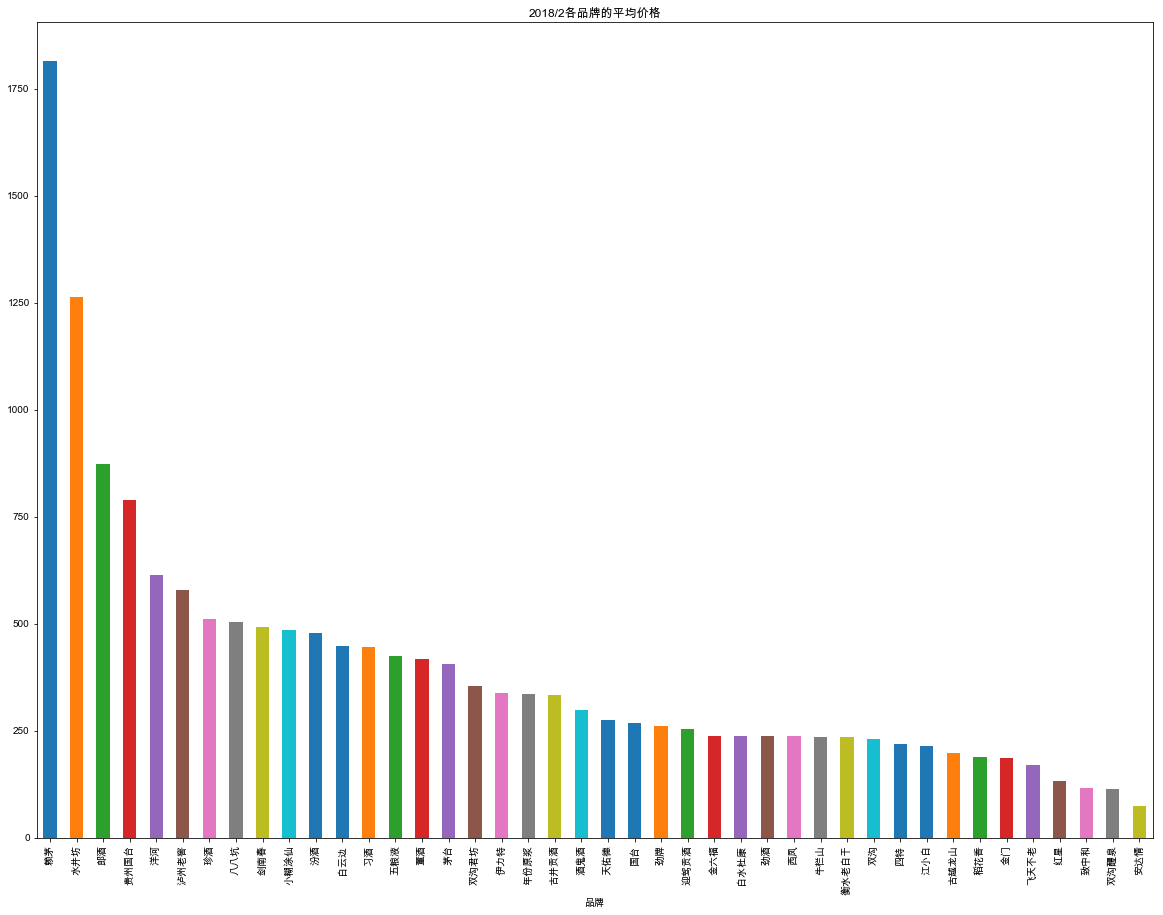

In [543]:


zongti=eryuebiao[["品牌","价格（元）","近30天销量（件）","评论数"]]
jige=zongti.groupby("品牌")["价格（元）"].describe().sort_values("mean",ascending=False)
plt.figure(figsize=(20,15))
jige["mean"].plot.bar()
plt.title("2018/2各品牌的平均价格")

In [206]:

key=lambda x:str(x.year)+str("-")+str(x.month)
zongti["月份"]=biao["日期"].apply(key)
zongti.groupby("月份").sum()

E:\anaconda\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


,价格（元）,近30天销量（件）,评论数
月份,,,
2017-11,388195.70,223560,1024649.0
2017-12,764178.90,642161,2231708.0
2017-5,271153.40,128671,722134.0
2017-7,307133.60,156841,874013.0
2017-8,347472.00,153258,767994.0
2017-9,373822.50,290567,0.0
2018-1,416274.70,566754,1258371.0
2018-2,370236.64,567595,1256974.0


### 泸州老窖的情况

#### 泸州老窖的销量情况

In [545]:
luzhou=biao[biao["品牌"].isin(["泸州老窖"])]
luzhou.groupby("价格（元）").sum().sort_values("近30天销量（件）",ascending=False).head(10)
luzhou

,ID,商品名称,价格（元）,近30天销量（件）,广告词,促销活动,评论数,商品链接,日期,品牌,总价,月份
2,540011154689,泸州老窖 泸州原浆柔和 52度 500mL 白酒浓香型,20.0,3116,NaN,NaN,25921.0,https://chaoshi.detail.tmall.com/item.htm?id=5...,2018-02-27,泸州老窖,62320.0,2018-2
45,520376014490,52度泸州老窖股份浓香源A6白酒整箱促销粮食酒,129.0,524,系出名门 高性价比 口粮酒之选,NaN,7166.0,https://chaoshi.detail.tmall.com/item.htm?id=5...,2018-02-27,泸州老窖,67596.0,2018-2
58,522072066498,泸州老窖特曲52度500ml* 2瓶浓香型白酒礼品礼袋装,420.0,2203,名酒限时直降，甄选好货，品质保障,满1件送任意1件赠品（赠完即止）,4959.0,https://chaoshi.detail.tmall.com/item.htm?id=5...,2018-02-27,泸州老窖,925260.0,2018-2
74,38380802514,泸州老窖特曲 52度 500mL浓香型 高度 白酒,218.0,1432,限时爆款直降，名酒甄选，品牌直供,满2件送任意2件赠品（赠完即止）,3769.0,https://chaoshi.detail.tmall.com/item.htm?id=3...,2018-02-27,泸州老窖,312176.0,2018-2
75,535886114523,泸州老窖 泸州原浆蓝色8 52度500mL*6白酒浓香型,188.0,2671,NaN,NaN,3732.0,https://chaoshi.detail.tmall.com/item.htm?id=5...,2018-02-27,泸州老窖,502148.0,2018-2
97,520278959736,泸州老窖股份N9浓香型52度白酒透明桶宴会送礼酒500ml,99.5,384,系出名门 酒质保证 包装上档次,满2件7折,2690.0,https://chaoshi.detail.tmall.com/item.htm?id=5...,2018-02-27,泸州老窖,38208.0,2018-2
108,532132163638,【天猫超市】泸州老窖家酒K652度500ml 高度白酒老窖酒厂自营,59.0,5,限时钜惠，更多优惠点击下方活动,NaN,2405.0,https://chaoshi.detail.tmall.com/item.htm?id=5...,2018-02-27,泸州老窖,295.0,2018-2
123,539746721726,52度泸州老窖双喜酒k6浓香型婚庆白酒整箱清仓特惠,129.0,55,泸州老窖出品,NaN,2018.0,https://chaoshi.detail.tmall.com/item.htm?id=5...,2018-02-27,泸州老窖,7095.0,2018-2
124,557097822281,泸州老窖龙香醇 珍藏 42度450mL*12浓香型白酒 光瓶,169.0,1706,NaN,NaN,2000.0,https://chaoshi.detail.tmall.com/item.htm?id=5...,2018-02-27,泸州老窖,288314.0,2018-2
143,520671323425,泸州老窖 特曲 52度500mLx6瓶 整箱装 高度白酒,1248.0,693,好货直降，甄选真品，品牌直供,NaN,1590.0,https://chaoshi.detail.tmall.com/item.htm?id=5...,2018-02-27,泸州老窖,864864.0,2018-2


In [654]:
luzhou.describe()

,ID,价格（元）,近30天销量（件）,评论数,总价
count,4.700000e+02,470.000000,470.000000,403.000000,4.700000e+02
mean,4.556201e+11,483.087021,352.751064,1229.602978,6.848924e+04
std,1.836766e+11,849.189226,1058.531704,2737.158644,1.439577e+05
min,3.650020e+10,16.500000,0.000000,0.000000,0.000000e+00
25%,5.203779e+11,89.000000,20.000000,118.000000,3.449000e+03
50%,5.346389e+11,179.000000,72.000000,410.000000,1.673500e+04
75%,5.406093e+11,409.000000,263.250000,1308.000000,6.436200e+04
max,5.642184e+11,5394.000000,13636.000000,25921.000000,1.493440e+06


{'boxes': [<matplotlib.lines.Line2D at 0x12fdb347518>,
 'caps': [<matplotlib.lines.Line2D at 0x12fdb347f28>,
 'fliers': [<matplotlib.lines.Line2D at 0x12fdb34bbe0>,
 'means': [],
 'medians': [<matplotlib.lines.Line2D at 0x12fdb34b7b8>,
 'whiskers': [<matplotlib.lines.Line2D at 0x12fdb347668>,
  <matplotlib.lines.Line2D at 0x12fdb38e160>]}

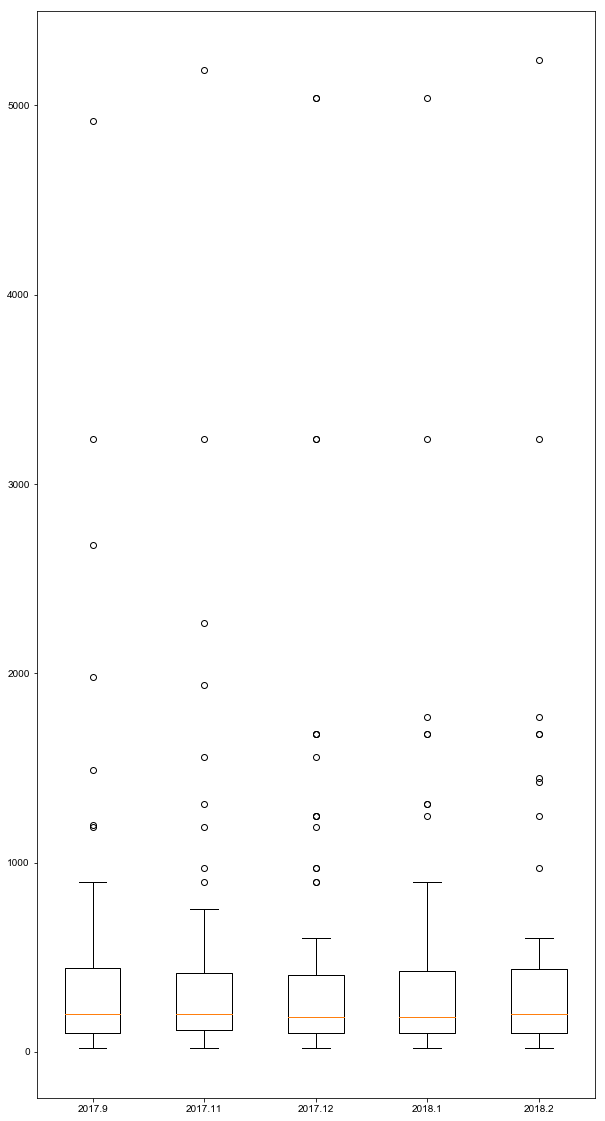

In [599]:
plt.figure(figsize=(10,20))
lu_2=luzhou[luzhou["月份"].isin(["2018-2"])]
lu_2["价格（元）"].values
eryue_x=[  20. ,  129. ,  420. ,  218. ,  188. ,   99.5,   59. ,  129. ,
        169. , 1248. ,  186. ,  108. ,  560. ,   18. ,   66.6,   68. ,
        389. ,  969. ,  436. ,  280. , 1680. ,  199. ,   99.9,   68. ,
       1680. ,  238. , 1428. ,  599. ,  399. ,  149. ,   59. , 5240. ,
        360. ,  179. ,  436. ,   89. ,   78. , 1768. ,  238. ,  299. ,
         58. , 1448. , 3240. ,  159. ,   59. ]

lu_1=luzhou[luzhou["月份"].isin(["2018-1"])]
lu_1["价格（元）"].values
yiyue_x=[  19.9,  129. ,  359. ,  416. ,  233. ,  168. ,   99.5,   59. ,
        129. ,  126. ,  186. ,  169. ,   99. ,  108. , 1248. ,   18. ,
        560. ,   68. ,  389. ,  436. ,  840. ,   75. ,  169. ,  148. ,
        305. ,  226.6,  142.8, 1680. ,   66.6,  258. ,   68. , 1308. ,
       1680. ,  599. ,   99.9,  399. ,  149. ,   99.9, 5040. ,  360. ,
         89. ,  168. ,  209. ,   69. ,  179. ,  899. ,   59. , 3240. ,
         58. ,  198. ,  297. , 1768. ,  233. , 1308. ,  436. ]

lu_12=luzhou[luzhou["月份"].isin(["2017-12"])]
lu_12["价格（元）"].values
shier_x=[  19.9,  129. ,  416. ,  359. ,  208. ,   99.5,   59. ,   59. ,
        168. ,  129. ,  186. ,  126. ,  299. ,   69. ,  109. , 1248. ,
         59. ,   18. ,  560. ,  159. ,   68. ,  359. ,   75. ,  139. ,
        436. ,  969. ,  179. ,  328. ,  258. , 1248. ,  119. ,   68. ,
        599. , 1680. , 1680. ,  198. ,   99.9,  409. ,  149. , 5040. ,
        299. ,  360. ,   89. ,   59. ,  168. ,   99.9,   99.9,  899. ,
         59. ,  299. , 3240. ,  269. ,   19.9,  129. ,  416. ,  369. ,
        218. ,   99.5,   59. ,  199. ,  234. ,  186. ,  126. ,   68. ,
         49. ,  109. ,  299. , 1248. ,   59. ,  369. ,  520. ,   68. ,
         75. ,  139. ,  396. ,  260. ,  969. ,  179. ,  169. ,  198. ,
       1188. , 1560. ,  599. , 1680. ,  409. ,  119. ,  149. ,  199. ,
        169. ,   99.9, 5040. ,  299. ,   88. ,   89. ,  168. ,   59. ,
        899. , 3240. ]
lu_11=luzhou[luzhou["月份"].isin(["2017-11"])]
lu_11["价格（元）"].values
shiyi_x=[  19.9,  129. ,  436. ,  218. ,  369. ,   59. ,   99.5,  199. ,
        198. ,  186. ,  126. ,   68. ,  109. ,  299. ,   59. ,  378. ,
       1308. ,   75. ,   78. ,  520. ,  168. ,  139. ,  179. ,  969. ,
        268. ,   49. ,  396. ,  218. , 1560. ,  179. ,  409. ,  599. ,
        149. ,   99. ,  378. , 1938. ,  198. ,  119. ,  299. ,  756. ,
         88. ,   89. , 2268. ,  165.6,   59. ,  899. , 3240. ,  169. ,
        129. , 5188. , 1188. ,  299. ]
lu_9=luzhou[luzhou["月份"].isin(["2017-9"])]
lu_9["价格（元）"].values
jiu_x=[ 359. ,  198. , 1188. ,  396. ,   99.5,  119. ,   99. ,   19.9,
        199. , 4920. ,  899. , 1488. , 1978. ,  499. ,  436. ,  299. ,
        479. ,  248. ,  599. , 1198. ,  378. ,  198. ,  149. ,  299. ,
         68. ,  198. ,  119. ,  899. ,  208. , 2678. ,  136. ,  198. ,
        139. ,   29. ,   78. ,   59. , 3240. ,  179. ,   59. ,  159. ,
        119. ,   68. ,  138. ,  299. ,  199. ,  846. ,   88. ,   89. ,
         75. ,   78. ,   99. ,   79. ,  446. ,   59. ]
plt.boxplot((jiu_x,shiyi_x,shier_x,yiyue_x,eryue_x),labels=("2017.9","2017.11","2017.12","2018.1","2018.2"))

In [576]:
# pd.crosstab(luzhou["商品名称"], luzhou["日期"], margins=True)

# luzhou

Text(0.5,1,'泸州老窖总体销售量趋势')

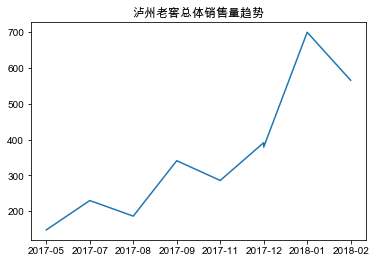

In [642]:
xiaoliang_zonge=luzhou.pivot_table("近30天销量（件）",index="商品名称",columns="日期",margins=True)
xiaoliang_zonge.loc["All",].index
xiaoliang_zonge.loc["All",].values
x=["2017-05", "2017-07", "2017-08",
       "2017-09", "2017-11", "2017-12",
       "2017-12", "2018-01", "2018-02"]
y=[148.06666667, 229.96226415, 186.47169811, 340.96296296,
       285.90384615, 391.2173913 , 378.82692308, 698.92727273,
       564.95555556]
plt.plot(x,y)
plt.title("泸州老窖总体销售量趋势")

Text(0.5,1,'泸州老窖总体销售额趋势')

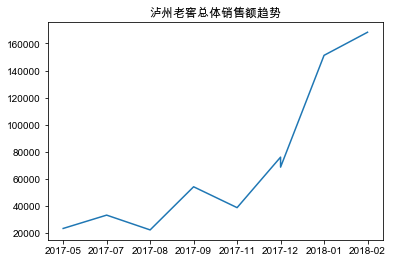

In [643]:
xiaoliang_zonge=luzhou.pivot_table("总价",index="商品名称",columns="日期",margins=True)
xiaoliang_zonge.loc["All",].index
xiaoliang_zonge.loc["All",].values
x=["2017-05", "2017-07", "2017-08",
       "2017-09", "2017-11", "2017-12",
       "2017-12", "2018-01", "2018-02"]
y=[ 23211.35,  33071.03207547,  22130.77924528,  54027.92222222,
        38598.87884615,  75946.11521739,  68543.16730769, 151204.03454545,
       168287.33555556]
plt.plot(x,y)
plt.title("泸州老窖总体销售额趋势")

In [561]:
eryuebiao_lu=luzhou[luzhou["日期"].isin(["2018-02-27"])]

qujian=eryuebiao_lu["价格（元）"]
# bins=[-1,50,100,150,200,250,300,350,400,1000,12000]
bins=[0,200,800,12000]
cats=pd.cut(qujian,bins)
# cats = pd.cut(qujian, 10, precision=1) 
cats

a=eryuebiao_lu["近30天销量（件）"].groupby(cats)
# a=biao["总价"].groupby(cats)

def get_stats(group):
    return group.describe()
#     return {'min': group.min(), 'max': group.max(), 'count': group.count(), 'mean': group.mean()}

fenzu_count=a.apply(get_stats).unstack()
fenzu_count

,count,mean,std,min,25%,50%,75%,max
价格（元）,,,,,,,,
"(0, 200]",23.0,720.086957,943.298464,2.0,67.0,342.0,654.5,3116.0
"(200, 800]",13.0,507.615385,657.587832,34.0,73.0,161.0,505.0,2203.0
"(800, 12000]",9.0,251.333333,250.432127,3.0,53.0,185.0,493.0,693.0


Text(0.5,1,'泸州老窖2018/2的平均销售量情况')

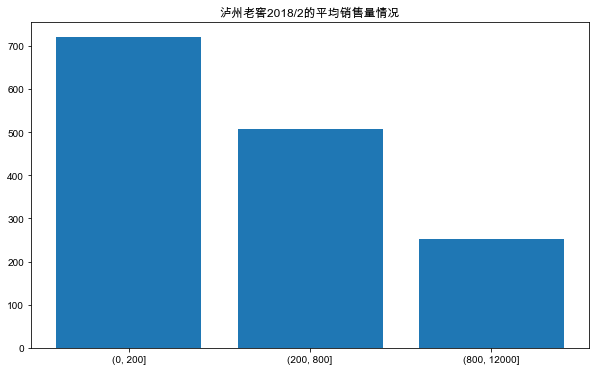

In [566]:

fenzu_count["mean"].index
fenzu_count["mean"].values

x=["(0, 200]", "(200, 800]", "(800, 12000]"]

y=[720.08695652, 507.61538462, 251.33333333]

plt.figure(figsize = (10, 6))
plt.bar(x,y)
plt.title("泸州老窖2018/2的平均销售量情况")

In [567]:
eryuebiao_lu=luzhou[luzhou["日期"].isin(["2018-02-27"])]

qujian=eryuebiao_lu["价格（元）"]
# bins=[-1,50,100,150,200,250,300,350,400,1000,12000]
bins=[0,200,800,12000]
cats=pd.cut(qujian,bins)
# cats = pd.cut(qujian, 10, precision=1) 
cats

a=eryuebiao_lu["总价"].groupby(cats)
# a=biao["总价"].groupby(cats)

def get_stats(group):
    return group.describe()
#     return {'min': group.min(), 'max': group.max(), 'count': group.count(), 'mean': group.mean()}

zongjia_count=a.apply(get_stats).unstack()
zongjia_count

,count,mean,std,min,25%,50%,75%,max
价格（元）,,,,,,,,
"(0, 200]",23.0,74614.569565,116856.771839,118.0,4927.0,36934.0,64958.0,502148.0
"(200, 800]",13.0,193455.846154,266977.320208,8092.0,32844.0,64239.0,196445.0,925260.0
"(800, 12000]",9.0,371318.777778,315834.476116,9720.0,97104.0,310800.0,477717.0,864864.0


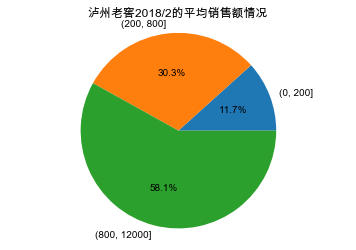

In [641]:

zongjia_count["mean"].index
zongjia_count["mean"].values

x=["(0, 200]", "(200, 800]", "(800, 12000]"]

y=[ 74614.56956522, 193455.84615385, 371318.77777778]

# plt.figure(figsize = (10, 6))
# plt.bar(x,y)
# plt.title("泸州老窖2018/2的平均销售额情况")

plt.pie(y,labels=x,autopct='%1.1f%%',shadow=False, )
plt.axis('equal') #正圆形饼图,x/y轴尺寸相等.默认是扁图,
plt.title("泸州老窖2018/2的平均销售额情况")
plt.show()

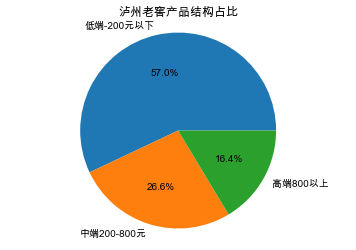

In [635]:

# eryuebiao.groupby("价格（元）").count()
qujian=luzhou["价格（元）"]
bins=[0,200,800,12000]
cats=pd.cut(qujian,bins)
# cats = pd.cut(qujian, 10, precision=1) 
cats
luzhou["价格（元）"].groupby(cats).count()
y=["低端-200元以下","中端200-800元","高端800以上"]
x=[268,125,77]
plt.pie(x,labels=y,autopct='%1.1f%%',shadow=False, )
plt.axis('equal') #正圆形饼图,x/y轴尺寸相等.默认是扁图,
plt.title("泸州老窖产品结构占比")
plt.show()

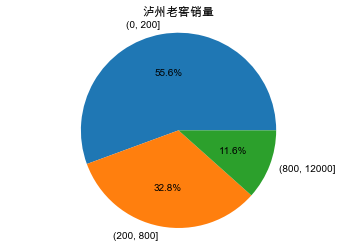

In [655]:
qujian=luzhou["价格（元）"]
# bins=[-1,50,100,150,200,250,300,350,400,1000,12000]
bins=[0,200,800,12000]
cats=pd.cut(qujian,bins)
# cats = pd.cut(qujian, 10, precision=1) 
cats

a=luzhou["近30天销量（件）"].groupby(cats)
# a=biao["总价"].groupby(cats)

def get_stats(group):
    return group.describe()
#     return {'min': group.min(), 'max': group.max(), 'count': group.count(), 'mean': group.mean()}

fenzu_count=a.apply(get_stats).unstack()
fenzu_count
fenzu_count["mean"].index
fenzu_count["mean"].values

x=["(0, 200]", "(200, 800]", "(800, 12000]"]

y=[463.35820896,273.368 ,96.64935065]

plt.pie(y,labels=x,autopct='%1.1f%%',shadow=False, )
plt.axis('equal') #正圆形饼图,x/y轴尺寸相等.默认是扁图,
plt.title("泸州老窖销量")
plt.show()

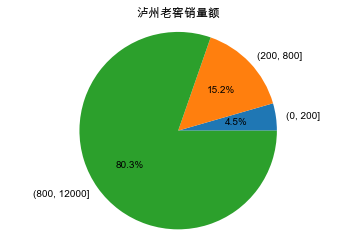

In [657]:
qujian=luzhou["价格（元）"]
# bins=[-1,50,100,150,200,250,300,350,400,1000,12000]
bins=[0,200,800,12000]
cats=pd.cut(qujian,bins)
# cats = pd.cut(qujian, 10, precision=1) 
cats

a=luzhou["价格（元）"].groupby(cats)
# a=biao["总价"].groupby(cats)

def get_stats(group):
    return group.describe()
#     return {'min': group.min(), 'max': group.max(), 'count': group.count(), 'mean': group.mean()}

fenzu_count=a.apply(get_stats).unstack()
fenzu_count
fenzu_count["mean"].index
fenzu_count["mean"].values

x=["(0, 200]", "(200, 800]", "(800, 12000]"]

y=[ 109.25485075,  371.7568    , 1964.94805195]

plt.pie(y,labels=x,autopct='%1.1f%%',shadow=False, )
plt.axis('equal') #正圆形饼图,x/y轴尺寸相等.默认是扁图,
plt.title("泸州老窖销量额")
plt.show()

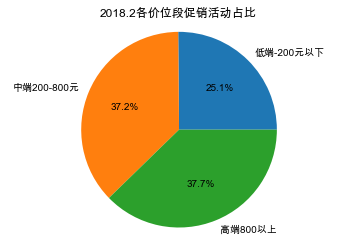

In [653]:
eryuebiao=luzhou[luzhou["日期"].isin(["2018-02-27"])]
cu=luzhou[luzhou["促销活动"].notnull()]
qujian=luzhou["价格（元）"]
bins=[0,200,800,12000]
cats=pd.cut(qujian,bins)

cats
luzhou["促销活动"].groupby(cats).count()
luzhou["价格（元）"].groupby(cats).count()
y=["低端-200元以下","中端200-800元","高端800以上"]
x=[116/268,80/125,50/77]
plt.pie(x,labels=y,autopct='%1.1f%%',shadow=False, )
plt.axis('equal') #正圆形饼图,x/y轴尺寸相等.默认是扁图,
plt.title("2018.2各价位段促销活动占比")
plt.show()
